In [107]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### 0.Read Data

In [108]:
df = pd.read_csv('../data/SpotifyFeatures.csv')

In [109]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [110]:
print(df.columns)

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [111]:
# Check for missing values
print("Missing values before removal:")
print(df.isnull().sum())

# Remove rows with missing values
df = df.dropna()

# Check for missing values after removal
print("\nMissing values after row removal:")
print(df.isnull().sum())

# Print the cleaned DataFrame
print("\nCleaned DataFrame (rows removed):")
df

Missing values before removal:
genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Missing values after row removal:
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Cleaned DataFrame (rows removed):


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [112]:
df.duplicated().sum()

0

<Axes: xlabel='popularity', ylabel='Count'>

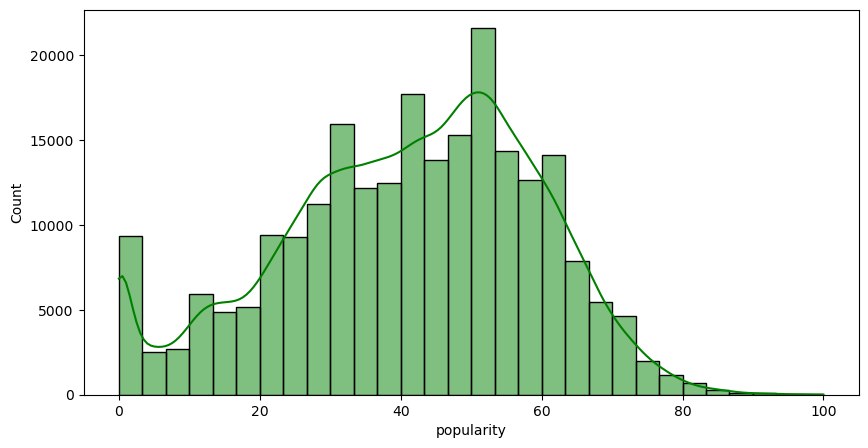

In [113]:
# Distribution of the popularity column = target variable
plt.figure(figsize=(10, 5))
sns.histplot(df['popularity'], kde=True, bins=30, color='green')

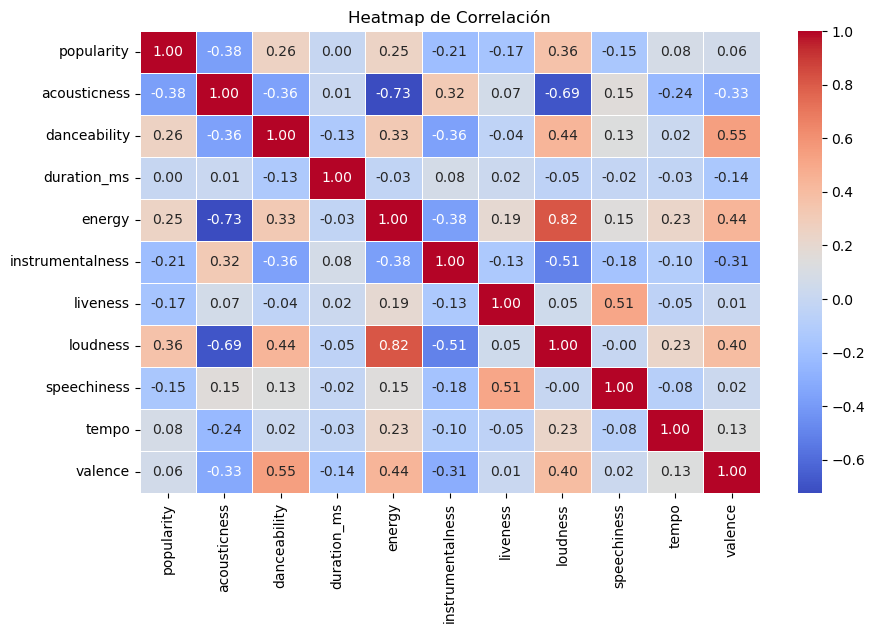

In [114]:
df_numeric = df.select_dtypes(include=['number'])  # Filtrar solo columnas numéricas
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()

### 1. Romoving columns that we are not going to use

In [115]:
df= df.drop(columns=['genre', 'artist_name', 'track_name', 'track_id'])

### 2. Transforming to data

Transform categorical variables: key, mode and time signature from text to numbers using one-hot-encoding. We also define popularity as a binary variable: "popular" and "no popular"

(array([23201., 15222., 27583., 20278., 26390., 17390.,  7566., 15159.,
        24077., 15526., 22671., 17661.]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <BarContainer object of 12 artists>)

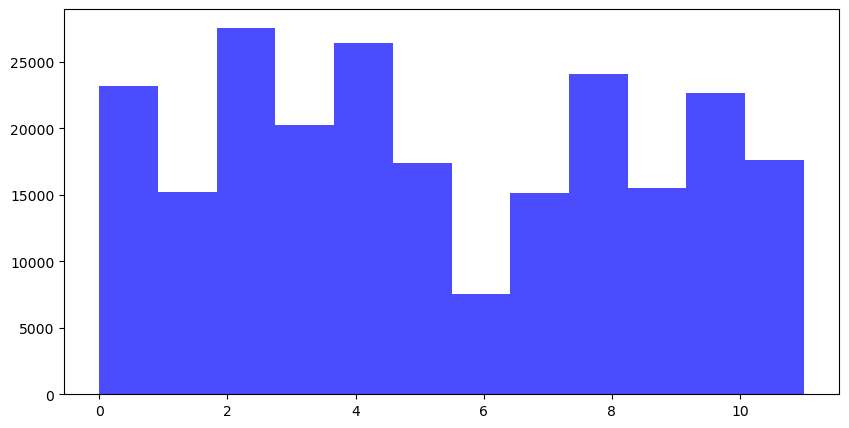

In [116]:
# Get unique values from the 'key' column
list_of_keys = df['key'].unique()

# Create a dictionary to map each key to a number
key_mapping = {key: i for i, key in enumerate(list_of_keys)}

# Replace values in the 'key' column
df['key'] = df['key'].map(key_mapping)

#Visualize the distribution of the 'key' column
plt.figure(figsize=(10,5))
plt.hist(df['key'], bins=12, color='blue', alpha=0.7)

(array([ 80981.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0., 151743.]),
 array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333, 0.91666667, 1.        ]),
 <BarContainer object of 12 artists>)

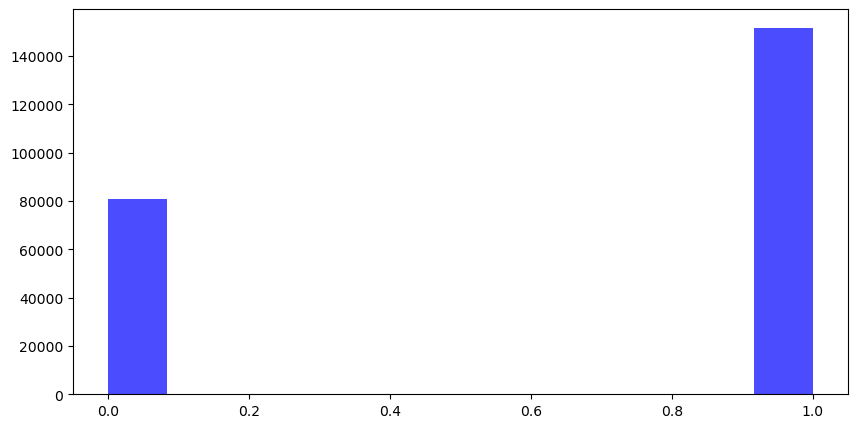

In [117]:
#Replace values in  the 'mode' column
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0
#Visualize the distribution of the 'mode' column
plt.figure(figsize=(10,5))
plt.hist(df['mode'], bins=12, color='blue', alpha=0.7)

In [118]:
# Calculate the quartiles of the 'popularity' column
quartiles = df['popularity'].quantile([0.25, 0.5, 0.75])

# Display the results
print(quartiles)

0.25    29.0
0.50    43.0
0.75    55.0
Name: popularity, dtype: float64


In [119]:
# Get unique values from the 'time_signature' column
list_of_time_signatures = df['time_signature'].unique()

# Create a dictionary to map each unique time signature to a number
time_signature_mapping = {ts: i for i, ts in enumerate(list_of_time_signatures)}

# Replace values in the 'time_signature' column
df['time_signature'] = df['time_signature'].map(time_signature_mapping)

For simplicity and using binary classification, we define as the top 25% popular songs as "popular", and the bottom 75% popular songs as "not popular".

In [120]:
# Convert 'popularity' to binary values (0 if <= 55, 1 if > 55)
df['popularity'] = (df['popularity'] >= 55).astype(int)

In [121]:
print(df["popularity"].value_counts())

popularity
0    174292
1     58432
Name: count, dtype: int64


### 3. Perform Train Test Split

In [122]:
features = df.drop(columns=["popularity","loudness"], axis = 1)
target = df["popularity"]

In [123]:
features.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

In [124]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

#### 3.1 Normalization

In [125]:
normalizer = MinMaxScaler()

In [126]:
#Fit to our training data
normalizer.fit(X_train)

MinMaxScaler()

In [127]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [128]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence
0,0.983936,0.297286,0.039070,0.221205,0.003994,1.000000,0.113427,1.0,0.078596,0.222483,0.0,0.244
1,0.848394,0.650252,0.010528,0.326313,0.301301,0.818182,0.102319,1.0,0.045609,0.657629,0.0,0.510
2,0.877510,0.629868,0.043059,0.433422,0.000000,0.454545,0.869740,0.0,0.975605,0.260902,0.5,0.470
3,0.557229,0.620212,0.036917,0.691685,0.000000,0.181818,0.088183,1.0,0.250106,0.243563,0.0,0.638
4,0.005070,0.479670,0.037510,0.926925,0.011512,0.909091,0.870750,0.0,0.029593,0.360463,0.0,0.232


In [129]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence
0,0.007952,0.862676,0.028306,0.605598,0.269269,0.363636,0.046278,1.0,0.128129,0.468018,0.0,0.817
1,0.260040,0.818689,0.034782,0.372360,0.000000,0.909091,0.079095,1.0,0.069156,0.372913,0.0,0.871
2,0.198795,0.787576,0.043406,0.575567,0.000006,0.909091,0.073743,1.0,0.056428,0.237837,0.0,0.847
3,0.960843,0.433537,0.023618,0.060942,0.000000,0.363636,0.105349,1.0,0.061095,0.302592,0.0,0.458
4,0.985944,0.333762,0.055776,0.382370,0.010511,0.272727,0.317399,0.0,0.080717,0.355908,0.0,0.274


### 4. Model Selection

Random Forest - We choose to try this because it's the model with best results in other prior analysis

In [130]:
#Inicialize Random Forest Classifier
forest = RandomForestClassifier()

In [131]:
#Training the model
forest.fit(X_train_norm, y_train)

RandomForestClassifier()

In [132]:
#Evaluate Random Forest Regressor
y_pred_rf = forest.predict(X_test_norm)
# classification metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9207
Precision: 0.9203
Recall: 0.9207
F1 Score: 0.9181

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     34889
           1       0.91      0.76      0.83     11656

    accuracy                           0.92     46545
   macro avg       0.92      0.87      0.89     46545
weighted avg       0.92      0.92      0.92     46545



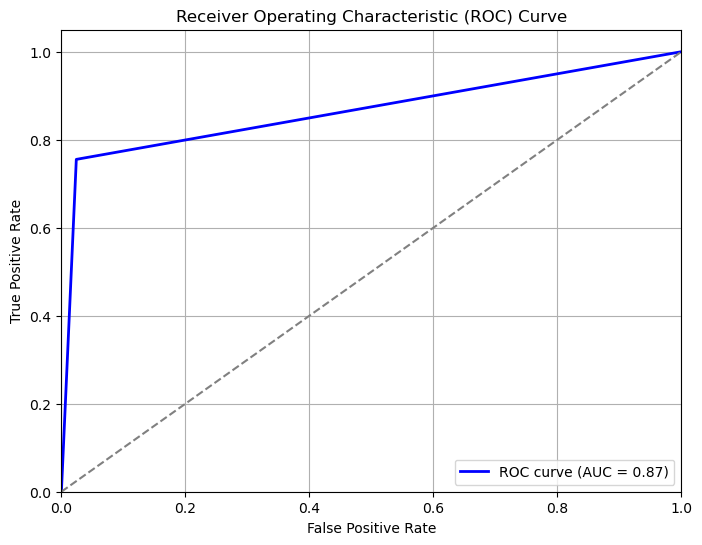

0.8656357274102732

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_true, y_scores):
    """
    Dibuja la curva ROC y devuelve la puntuación AUC.
    Parámetros:
    - y_true: array-like, valores reales (0 o 1).
    - y_scores: array-like, probabilidades predichas para la clase positiva (1).
    Retorna:
    - roc_auc: float, área bajo la curva ROC.
    """
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal de referencia
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    return roc_auc

plot_roc_curve(y_test, y_pred_rf)